In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

In [2]:
!pip install tensorflow

In [3]:
#Installing yellow brick for model
!pip install yellowbrick
import warnings
warnings.filterwarnings("ignore")

In [4]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV and Perform Basic Data Cleaning

In [6]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [7]:
# Set features. This will also be used as your x values.
X = df.drop("koi_disposition", axis=1)
y = df["koi_disposition"]

print(X.shape, y.shape)

(6991, 40) (6991,)


# Create a Train Test Split

Use `koi_disposition` for the y values

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

#Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=115, stratify=y)

In [9]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
2700,0,0,0,0,31.804760,0.000091,-0.000091,190.25413,0.00224,-0.00224,...,-128,4.235,0.143,-0.117,1.356,0.212,-0.259,287.62082,43.141647,13.178
21,0,0,0,0,4.280964,0.000006,-0.000006,171.89659,0.00115,-0.00115,...,-169,4.564,0.032,-0.168,0.831,0.207,-0.069,294.26581,49.314091,15.356
5040,0,1,1,0,0.829019,0.000002,-0.000002,131.46667,0.00401,-0.00401,...,-255,4.271,0.124,-0.186,1.328,0.408,-0.220,296.03485,45.490822,14.661
2795,0,0,1,0,1.387838,0.000006,-0.000006,132.11351,0.00318,-0.00318,...,-219,4.442,0.054,-0.216,1.044,0.335,-0.112,295.64212,48.773071,15.167
1765,0,0,0,0,14.383227,0.000086,-0.000086,140.57648,0.00530,-0.00530,...,-135,4.249,0.137,-0.112,1.291,0.216,-0.216,290.08276,50.863480,13.312


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [10]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train the Model
# Applying Neural Network


In [11]:
from tensorflow.keras.utils import to_categorical
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [12]:
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)
print(label_encoder.classes_)

['CANDIDATE' 'CONFIRMED' 'FALSE POSITIVE']


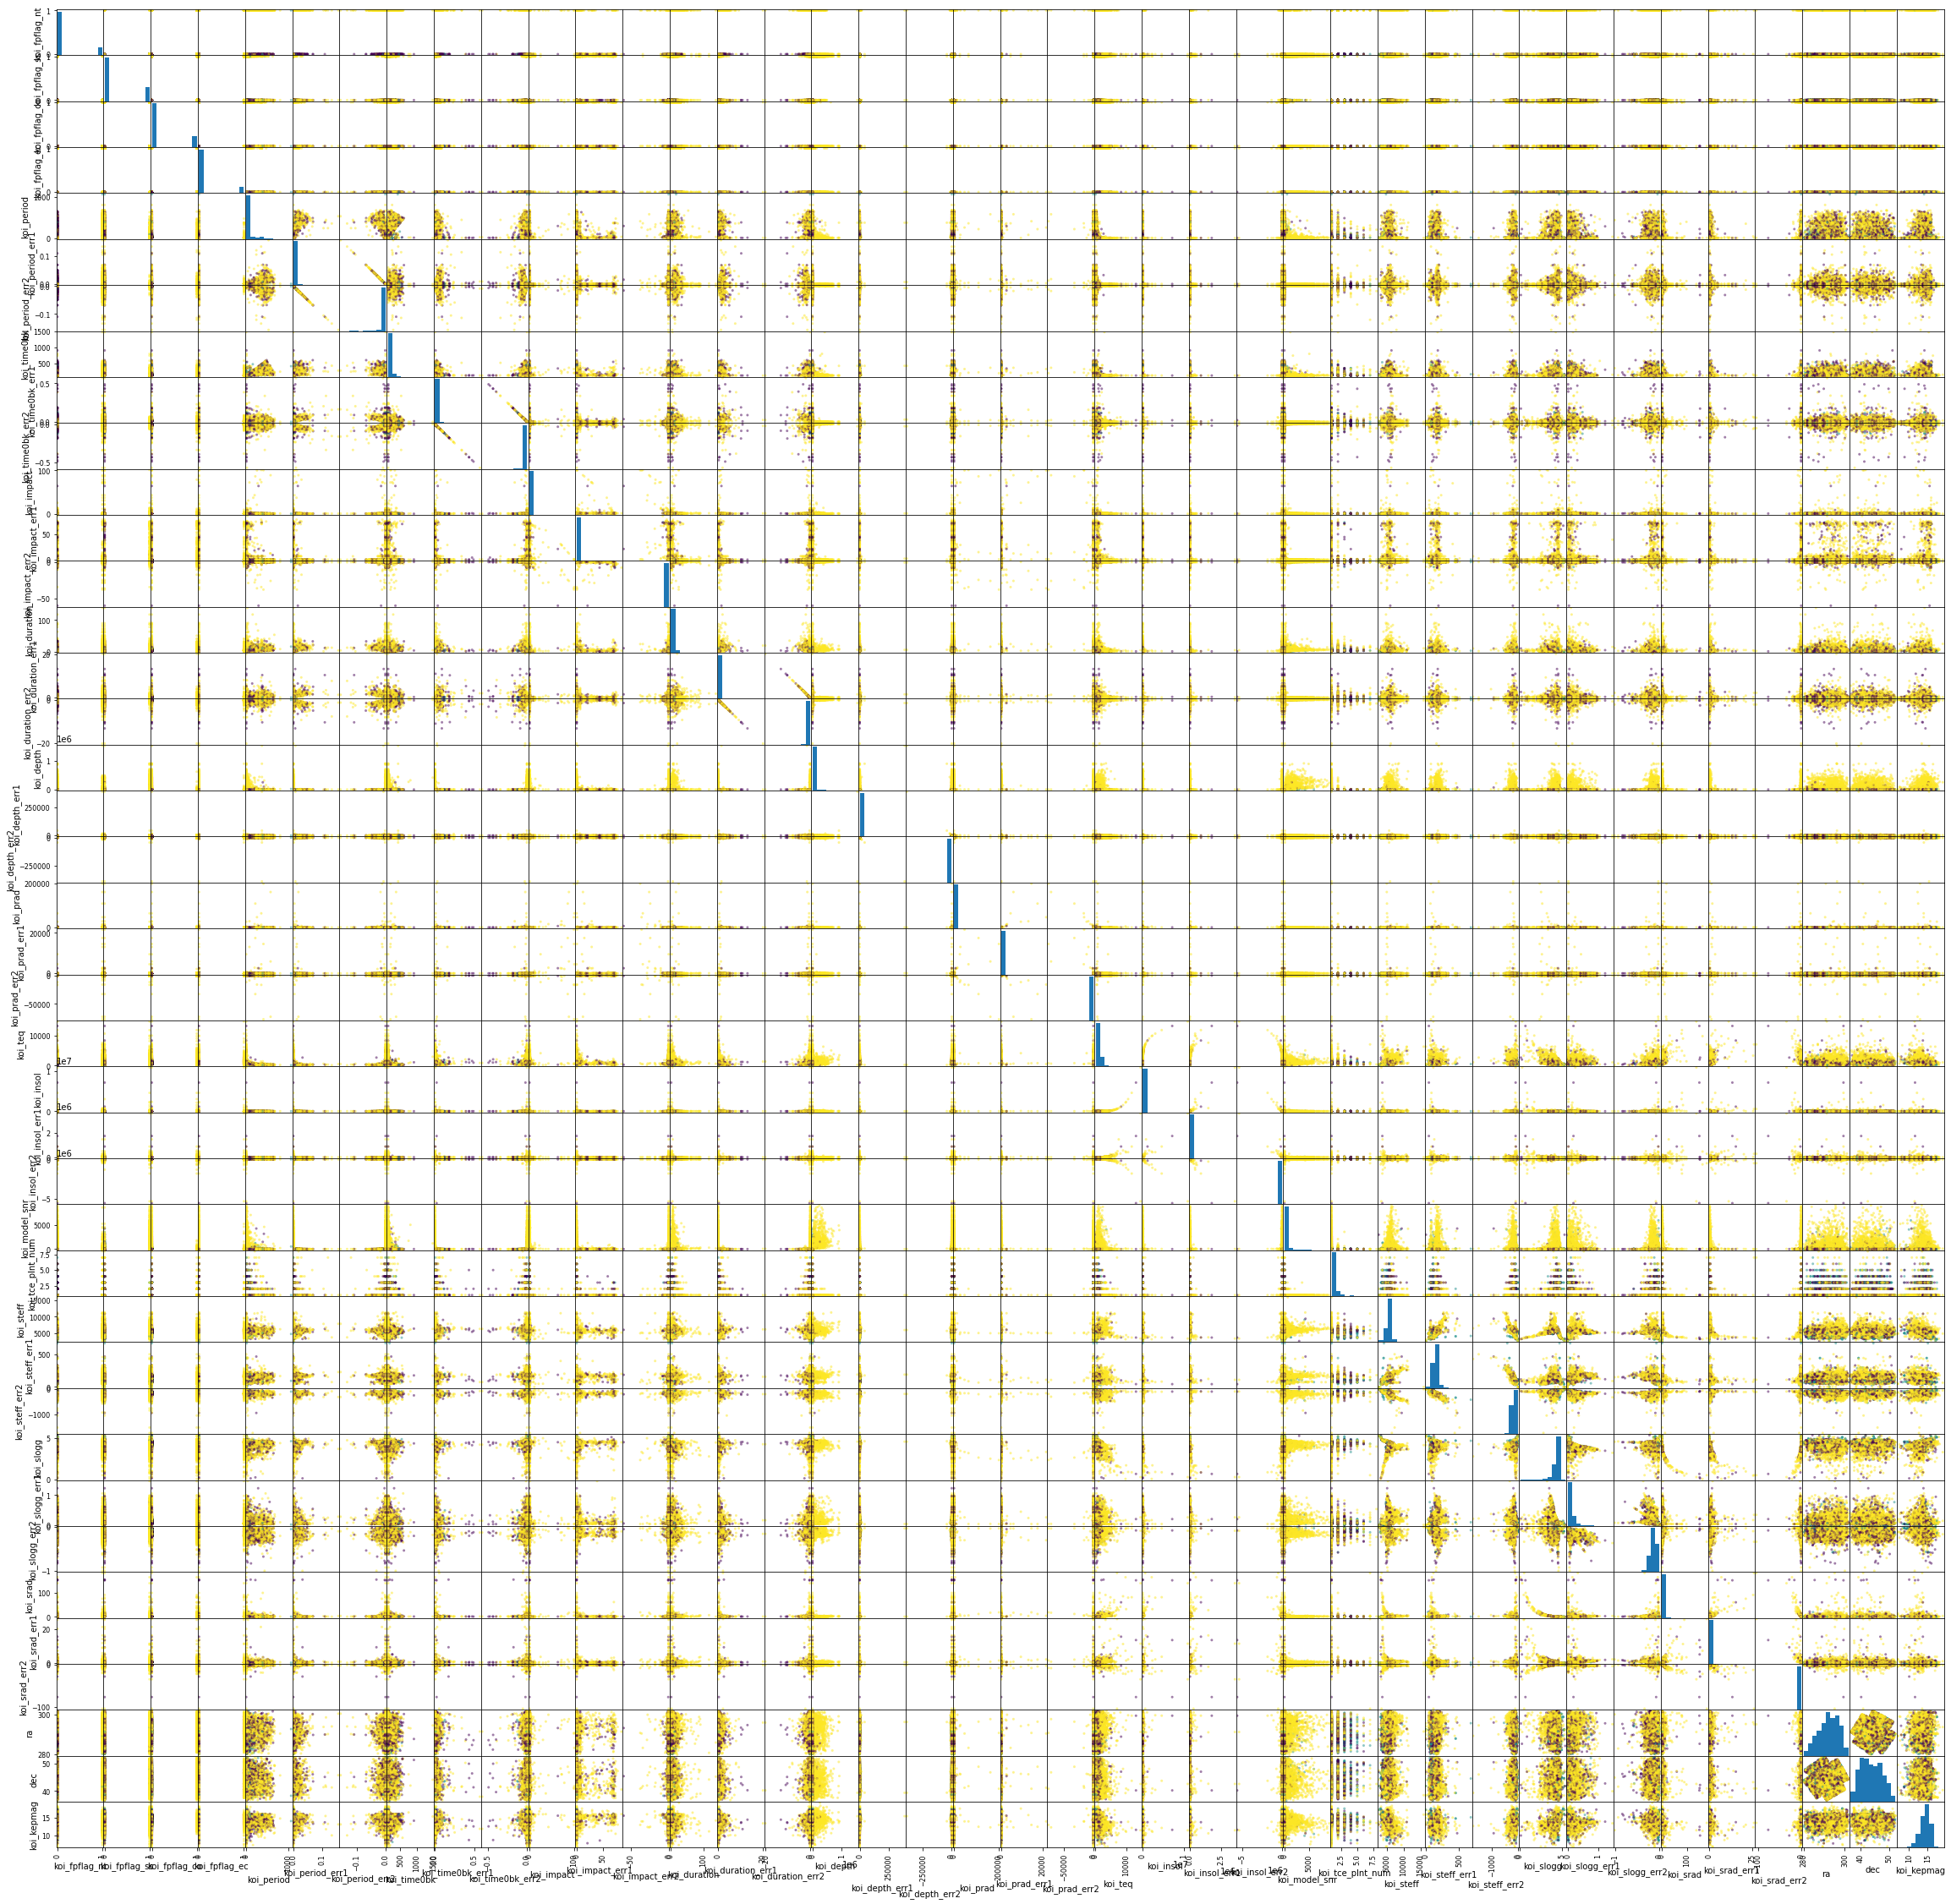

In [13]:
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)
pd.plotting.scatter_matrix(X, c=encoded_y, figsize=(40, 40));
plt.savefig('image_models/neuralnetwork.png')

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=10, activation='relu', input_dim=40))
model.add(Dense(units=3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                410       
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 33        
Total params: 443
Trainable params: 443
Non-trainable params: 0
_________________________________________________________________


In [15]:
#Model compilation
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
#Model fitting into training data
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
164/164 - 1s - loss: 0.9917 - accuracy: 0.4570
Epoch 2/100
164/164 - 0s - loss: 0.7756 - accuracy: 0.6195
Epoch 3/100
164/164 - 0s - loss: 0.6047 - accuracy: 0.7753
Epoch 4/100
164/164 - 0s - loss: 0.4998 - accuracy: 0.8001
Epoch 5/100
164/164 - 0s - loss: 0.4432 - accuracy: 0.8043
Epoch 6/100
164/164 - 0s - loss: 0.4090 - accuracy: 0.8179
Epoch 7/100
164/164 - 0s - loss: 0.3838 - accuracy: 0.8247
Epoch 8/100
164/164 - 0s - loss: 0.3684 - accuracy: 0.8285
Epoch 9/100
164/164 - 0s - loss: 0.3579 - accuracy: 0.8323
Epoch 10/100
164/164 - 0s - loss: 0.3519 - accuracy: 0.8339
Epoch 11/100
164/164 - 0s - loss: 0.3456 - accuracy: 0.8396
Epoch 12/100
164/164 - 0s - loss: 0.3441 - accuracy: 0.8383
Epoch 13/100
164/164 - 0s - loss: 0.3397 - accuracy: 0.8386
Epoch 14/100
164/164 - 0s - loss: 0.3362 - accuracy: 0.8409
Epoch 15/100
164/164 - 0s - loss: 0.3332 - accuracy: 0.8423
Epoch 16/100
164/164 - 0s - loss: 0.3311 - accuracy: 0.8463
Epoch 17/100
164/164 - 0s - loss: 0.3294 - accura

# Model Accuracy & Loss


In [17]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

55/55 - 0s - loss: 0.2860 - accuracy: 0.8839
Normal Neural Network - Loss: 0.2860074043273926, Accuracy: 0.8838672637939453


# Save the Model

In [19]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# and "your_model" with your model variable
# be sure to turn this in to BCS
model.save = 'models/sam_neuralnetwork.h5'